# Detection Based on Zeros of the Spectrogram
Based on the method proposed by Bardenet, Rémi, Julien Flamant, and Pierre Chainais. 
"On the zeros of the spectrogram of white noise." 
Applied and Computational Harmonic Analysis 48.2 (2020): 682-705. 


In [1]:
import numpy as np
from numpy import pi as pi
import scipy.signal as sg
import scipy.io 
import matplotlib.pyplot as plt
import cmocean
from spatstats_utils import compute_hyp_test, clopper_pearson
from utilstf import get_round_window, get_spectrogram, sigmerge, find_zeros_of_spectrogram_2

In [2]:
# Export signal and noise realizations used in matlab tests.
mat_file = scipy.io.loadmat('noise_matrix.mat')
noise_matrix = mat_file['noise_matrix']
# noise_matrix = np.random.randn(500,256)
x = mat_file['x']
N = len(x)
x = np.reshape(x,(N,))
xnoise, noise = sigmerge(x, noise_matrix[0,:],10,return_noise=True)
# Check snr:
print(20*np.log10(np.linalg.norm(x)/np.linalg.norm(noise)))

nreps = noise_matrix.shape[0]
snr_in = [0,5,10]

9.999999999999996


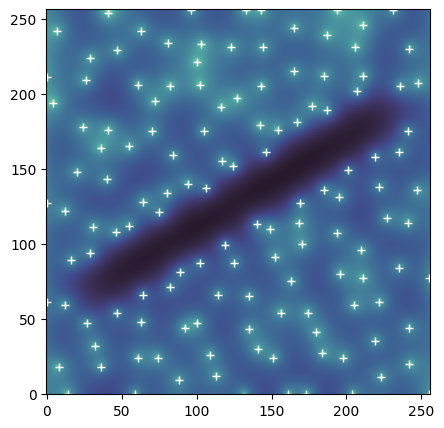

In [18]:
# Check the signal.
Nfft = 2*N
S, stft, stft_padded, Npad = get_spectrogram(xnoise)
ceros = find_zeros_of_spectrogram_2(S)
fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax.plot(ceros[:,1],ceros[:,0],'w+')
plt.show()

In [ ]:
results = np.zeros((nreps,len(snr_in)))
for k,snr in enumerate(snr_in):
    for i in range(nreps):
        xnoise = sigmerge(x, noise_matrix[i,:], snr)
        reject_H0 = compute_hyp_test(xnoise, alpha=0.14, statistic='F', pnorm=2, rmax=1.0, return_values=False)
        results[i,k] = reject_H0[0]

In [3]:
# Check the tests significance (this is fixed but design, but is a good sanity check).
results_noise = np.zeros((nreps,))
for i in range(nreps):
    noise = noise_matrix[i,:]
    reject_H0 = compute_hyp_test(noise, alpha=0.05, statistic='F', pnorm=2, rmax=1.0, return_values=False)
    results_noise[i] = reject_H0[0]
    print(reject_H0)

print(np.mean(results_noise))

Computing test...
10
[ True]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[ True]
Computing test...
10
[False]
Computing test...
10
[ True]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[ True]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test...
10
[False]
Computing test

In [ ]:
# Save results.
all_results = np.concatenate(((1-results_noise).reshape((len(results_noise),1)), results), axis=1)
print(np.mean(all_results, axis=0))
# np.savetxt('results.csv', all_results.astype(int), delimiter=",")